# Predicción de fallo cardíaco


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Lectura del fichero


In [2]:
heart_data = pd.read_csv("datasets/heart.csv")
heart_data.shape

(918, 12)

1. Preprocesado de los datos


- Comprobación de valores nulos


In [3]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

- Transformación de variables categóricas a numéricas


In [4]:
heart_data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
label_encoder = LabelEncoder()
for x in heart_data.columns:
    if heart_data[x].dtype == 'object':
        heart_data[x] = label_encoder.fit_transform(heart_data[x])
heart_data.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [6]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


- Estandarizado de datos


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(heart_data.drop('HeartDisease', axis=1))

2. Selección de modelos


In [8]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision_Tree': DecisionTreeClassifier(),
    'Random_Forest': RandomForestClassifier(),
    'SVC': SVC(probability=True),
    'Naive_Bayes': GaussianNB()
}

3. Entrenamiento y validación de modelos


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_data, heart_data['HeartDisease'], test_size=0.2, random_state=42)

scores = {}

for name, model in models.items():
    scores[name] = cross_val_score(model, X_train, y_train, scoring='accuracy')
    print(f'{name}: Average Accuracy={np.mean(scores[name]):.4f}')

KNN: Average Accuracy=0.8569
Decision_Tree: Average Accuracy=0.7766
Random_Forest: Average Accuracy=0.8678
SVC: Average Accuracy=0.8665
Naive_Bayes: Average Accuracy=0.8624


4. Evaluación y comparación de modelos


In [35]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} - Average Accuracy: {np.mean(scores[name]):.4f}')
    print(classification_report(y_test, y_pred))
    print(
        f"AUC (Cross-validated): {np.mean(cross_val_score(model, X_train, y_train, scoring='roc_auc')):.4f}")
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    print(f'AUC (Manual): {auc(fpr, tpr):.4f}')

KNN - Average Accuracy: 0.8569
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

AUC (Cross-validated): 0.9038
AUC (Manual): 0.9209
Decision_Tree - Average Accuracy: 0.7807
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        77
           1       0.87      0.79      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184

AUC (Cross-validated): 0.7776
AUC (Manual): 0.8081
Random_Forest - Average Accuracy: 0.8597
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        77
           1       0.9

In [21]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'----- {name} -----')
    print(f'Average Accuracy: {np.mean(scores[name]):.4f}')
    print(classification_report(y_test, y_pred))

----- KNN -----
Average Accuracy: 0.8569
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

----- Decision_Tree -----
Average Accuracy: 0.7752
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        77
           1       0.86      0.77      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184

----- Random_Forest -----
Average Accuracy: 0.8610
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        77
           1       0.93      0.88      0.90       107

    accuracy                           

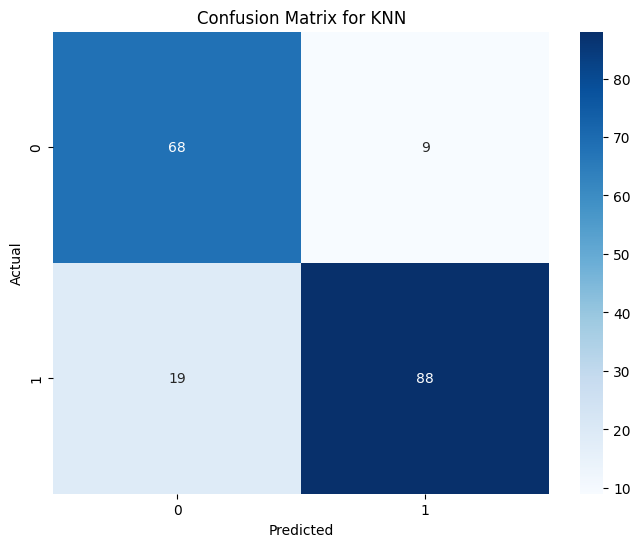

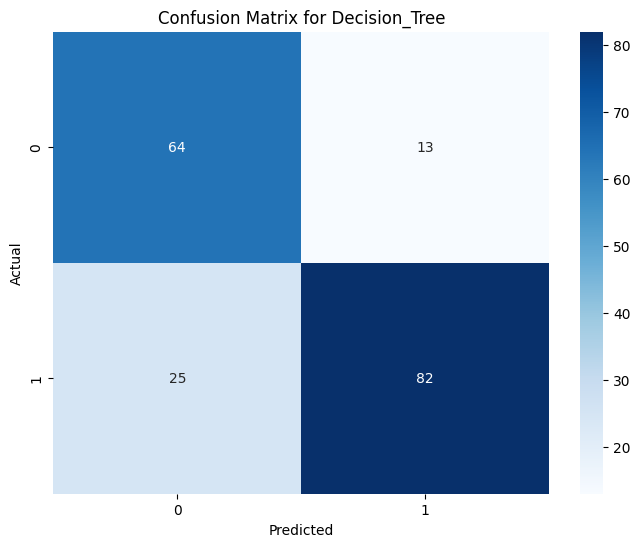

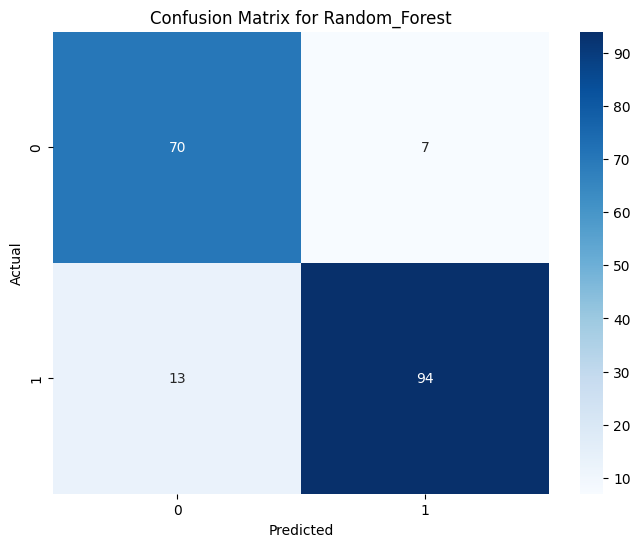

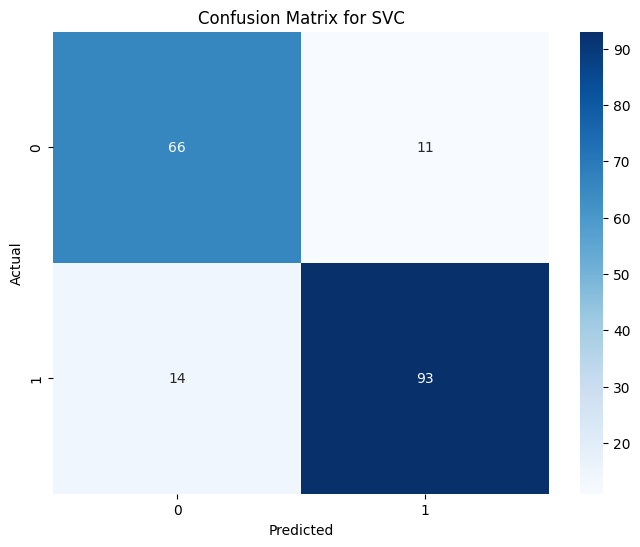

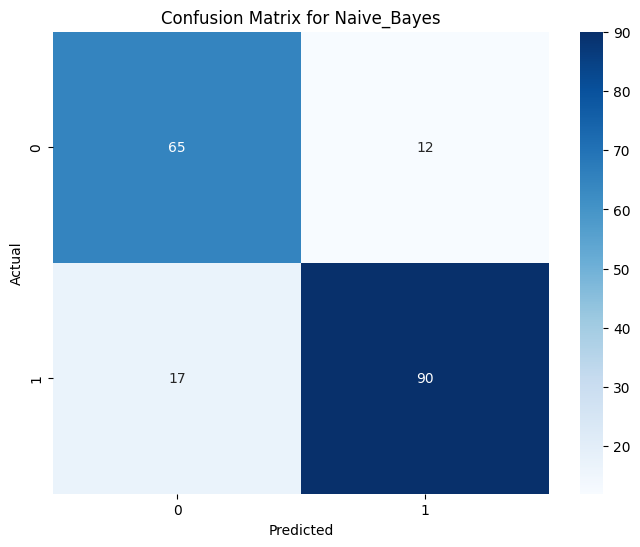

In [22]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

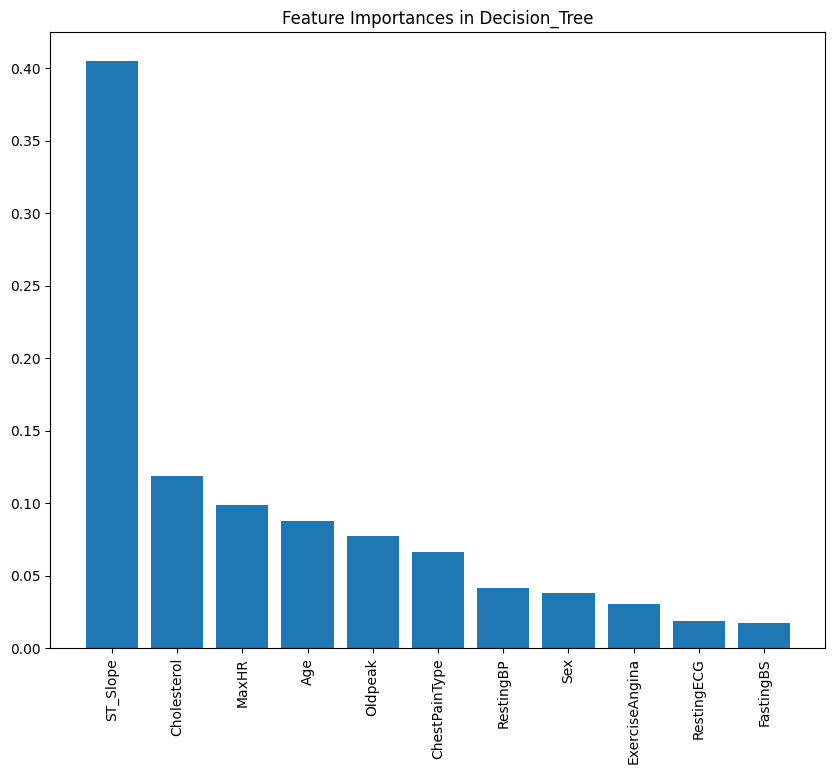

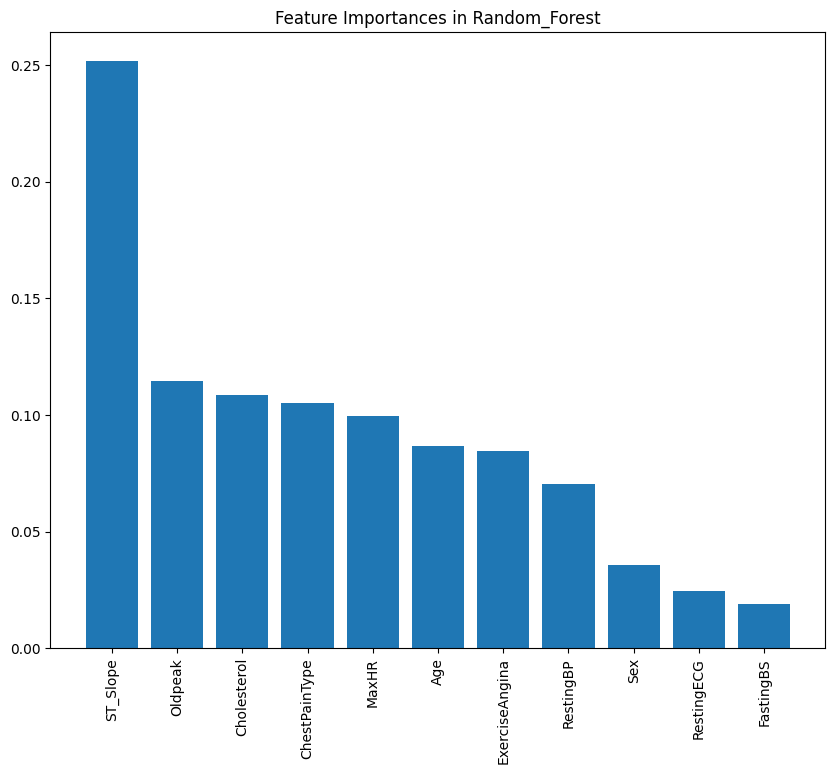

In [23]:
def importances(model_name):
    plt.figure(figsize=(10, 8))
    importance = models[model_name].feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.title('Feature Importances in ' + model_name)
    plt.bar(range(X_train.shape[1]), importance[indices])
    plt.xticks(range(X_train.shape[1]),
               heart_data.columns[indices], rotation=90)
    plt.show()


if 'Decision_Tree' in models:
    importances('Decision_Tree')

if 'Random_Forest' in models:
    importances('Random_Forest')

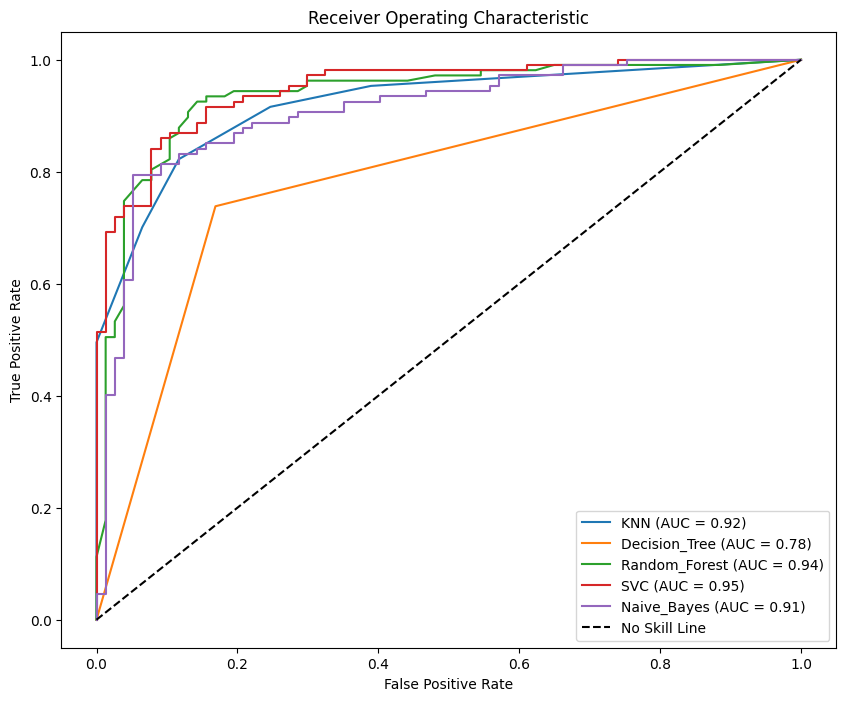

In [29]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Get predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC for this model
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()